# 2020-09-11 Exam: Association Rules

Find the best classification scheme for the included dataset.
The solution must be produced as a Python Notebook.
The notebook must include appropriate comments and must operate
as follows:

0. read a market basket database from the csv file provided and
generate a dataframe basket of boolean values with one row
per transaction and one column per distinct item of the
database; the dataframe values must be True if a distinct item
is contained in the transaction

    • the file contains one transaction per line, the first
element is the number of items in the transaction,
followed by the items of the transaction, and then a
variable number of empty fields

    • the field names in the first row of the csv file are not
relevant
1. ignore the transactions containing a single item (2 points)
2. the column names of the output dataframe are the distinct items
(2 points)
3. show the first five rows of the output dataframe (1 point)
4. show the number of transactions and of distinct items
(1 point)
5. find a value of min_support such that the apriori algorithm
generates at least 8 frequent itemsets with at least 2 items
 (5 points)

    • output the result with the message below
    
    • min_support: 0.xxxx - number of itemsets with at least 2
items: nn)
6. find the minimum metric threshold such that at least 10
association rules are extracted from the frequent itemsets found
(5 points)

    • use "confidence" as metric and output the line below:

    • Metric: "confidence" - min_metric: 0.xxxx - Number of
rules: n
7. print the first 10 rules found, sorted by descending confidence
and support (3 points)
8. plot confidence and support for all the sorted rules found
(3 points)
9. scatter plot the rules by confidence and support, labelling the
points with the index value of the corresponding rule
(hint https://stackoverflow.com/questions/14432557/matplotlibscatter-plot-with-different-text-at-each-data-point) (3 points)


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'mba.csv'
random_state = 42

## 0. read a market basket database from the csv file provided and generate a dataframe basket of boolean values with one row per transaction and one column per distinct item of the database; the dataframe values must be True if a distinct item is contained in the transaction

    • the file contains one transaction per line, the first element is the number of items in the transaction, followed by the items of the transaction, and then a variable number of empty fields

    • the field names in the first row of the csv file are not relevant

In [135]:
file = open(url, mode='r')
transactions = [line for line in file.readlines()]
transactions[:10]

['Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32\n',
 '4,citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,\n',
 '3,tropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\n',
 '1,whole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\n',
 '4,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,\n',
 '4,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,\n',
 '5,whole milk,butter,yogurt,rice,abrasive cleaner,,,,,,,,,,,,,,,,,,,,,,,,,,,\n',
 '1,rolls/buns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\n',
 '5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),,,,,,,,,,,,,,,,,,,,,,,,,,,\n',
 '1,potted plants,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\n']

In [136]:
from mlxtend.preprocessing import TransactionEncoder

file = open(url, mode='r')
transactions = [line.strip('\n').split(',') for line in file.readlines()]
transactions = transactions[1:]     #removing first row in file

n = []
for t in transactions:      #removing number of items in transaction at row start, and empty fields
    last_el_index = int(t[0])+1
    n.append(t[1:last_el_index])    
transactions = n

encoder = TransactionEncoder()
data = encoder.fit_transform(transactions)
df = pd.DataFrame(data.astype(bool))

df

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 1. ignore the transactions containing a single item (2 points)


In [137]:
#print('DataFrame length with itemset containig 1 element: {}'.format(df[len(row)==1 for row in df.iterrows()].shape[0]))

indexes_to_remove = []
n_removed = 0
for index, row in df.iterrows():
    c = sum(el == True for i, el in row.items())
    if(c <= 1):
        indexes_to_remove.append(index)
    else:
        n_removed+=1
print('Removed {} itemsets containg only 1 item'.format(n_removed))
df.drop(index=indexes_to_remove, axis=0, inplace=True)
df


Removed 7676 itemsets containg only 1 item


,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2. the column names of the output dataframe are the distinct items (2 points)


In [138]:
df.columns = encoder.columns_

## 3. show the first five rows of the output dataframe (1 point)


In [139]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


## 4. show the number of transactions and of distinct items (1 point)


In [140]:
print('The number of transactions is {}, with {} distinct items'.format(df.shape[0], df.shape[1]))

The number of transactions is 7676, with 169 distinct items


## 5. find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items (5 points)

    • output the result with the message below
    
    • min_support: 0.xxxx - number of itemsets with at least 2 items: nn)


In [141]:
from mlxtend.frequent_patterns import apriori
min_support = 0
support_range = np.arange(0.1, 0.01, -0.01)
min_frequent_itemsets = 8
min_items = 2

for support in support_range:
    print('Trying min_support: {:.2f}..'.format(support))
    frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
    num_itemsets = sum(len(itemset) >= min_items for itemset in frequent_itemsets.itemsets)
    if (num_itemsets > min_frequent_itemsets):
        min_support = support
        break
    
if(min_support == 0):
    print('Change thresholds! nothing found..')
else:
    print('min_support: {:.4f} - number of itemsets with at least 2 items: {}'.format(min_support, num_itemsets))

Trying min_support: 0.10..
Trying min_support: 0.09..
Trying min_support: 0.08..
Trying min_support: 0.07..
Trying min_support: 0.06..
Trying min_support: 0.05..
min_support: 0.0500 - number of itemsets with at least 2 items: 9


## 6. find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points)

    • use "confidence" as metric and output the line below:

    • Metric: "confidence" - min_metric: 0.xxxx - Number of rules: n


In [142]:
from mlxtend.frequent_patterns import association_rules
min_metric_range = np.arange(20, 0.01, -0.01)
min_association_rules = 10
min_metric_found = 0

for min_metric in min_metric_range:
    #print('Trying min_metric: {:.2f}..'.format(min_metric))
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_metric)
    if rules.shape[0] > min_association_rules:
        min_metric_found = min_metric
        break

if min_metric_found == 0:
    print('Change thresholds! nothing found..')
else:
    print('Metric: "confidence" - min_metric: {:.4f} - Number of rules: {}'.format(min_metric_found, rules.shape[0]))

Metric: "confidence" - min_metric: 0.2400 - Number of rules: 11


## 7. print the first 10 rules found, sorted by descending confidence and support (3 points)


In [143]:
sorted_rules = rules[:10].sort_values(by=['confidence', 'support'], ascending=False).reset_index(drop=True)

## 8. plot confidence and support for all the sorted rules found (3 points)


<Axes: >

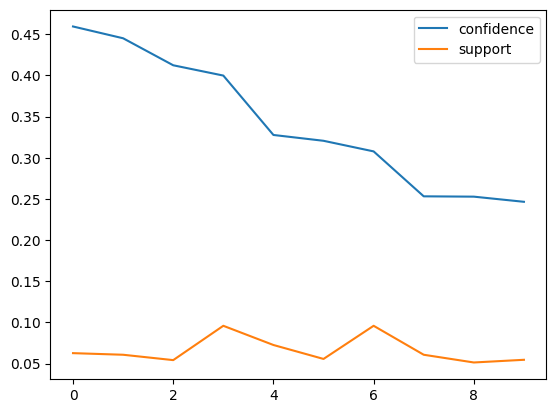

In [144]:
sorted_rules[['confidence', 'support']].plot()

## 9. scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule (3 points)
(hint https://stackoverflow.com/questions/14432557/matplotlibscatter-plot-with-different-text-at-each-data-point) 

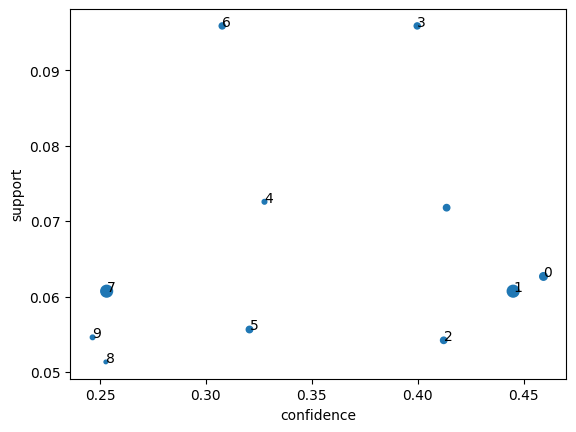

In [152]:
fig = rules.plot.scatter(x='confidence'
                   , y='support'
                   , s = [[10**n for n in rules.lift]])

for i in range(len(sorted_rules)):
    fig.annotate(text = i, xy = (sorted_rules['confidence'][i], sorted_rules['support'][i]))